In [12]:
import pandas as pd
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import qeds
%matplotlib inline
import os
import math
import qeds
qeds.themes.mpl_style();

from IPython.display import display
import statistics

In [13]:
bonds = pd.read_csv('10Bonds_spot_forward.csv')
bonds

,bond_name,Coupon,ttm1,ttm2,ttm3,ttm4,ttm5,ttm6,ttm7,ttm8,...,AI1,AI2,AI3,AI4,AI5,AI6,AI7,AI8,AI9,AI10
0,CAN 0.25 Aug 22,0.25,0.556,0.553,0.550,0.547,0.544,0.536,0.533,0.531,...,0.0,-0.002,-0.003,-0.005,-0.006,-0.011,-0.012,-0.014,-0.015,-0.017
1,CAN 0.25 Feb 23,0.25,1.056,1.053,1.050,1.047,1.044,1.036,1.033,1.031,...,0.0,-0.003,-0.006,-0.009,-0.012,-0.021,-0.023,-0.026,-0.029,-0.032
2,CAN 0.25 Aug 23,0.25,1.556,1.553,1.550,1.547,1.544,1.536,1.533,1.531,...,0.0,-0.004,-0.009,-0.013,-0.017,-0.030,-0.035,-0.039,-0.043,-0.048
3,CAN 0.75 Feb 24,0.75,2.056,2.053,2.050,2.047,2.044,2.036,2.033,2.031,...,0.0,-0.006,-0.011,-0.017,-0.023,-0.040,-0.046,-0.051,-0.057,-0.063
4,CAN 1.50 Sept 24,1.50,2.639,2.636,2.633,2.631,2.628,2.619,2.617,2.614,...,0.0,-0.007,-0.015,-0.022,-0.029,-0.051,-0.059,-0.066,-0.073,-0.081
5,CAN 1.25 Mar 25,1.25,3.139,3.136,3.133,3.131,3.128,3.119,3.117,3.114,...,0.0,-0.009,-0.017,-0.026,-0.035,-0.061,-0.070,-0.078,-0.087,-0.096
6,CAN 0.50 Sept 25,0.50,3.639,3.636,3.633,3.631,3.628,3.619,3.617,3.614,...,0.0,-0.010,-0.020,-0.030,-0.040,-0.071,-0.081,-0.091,-0.101,-0.111
7,CAN 0.25 Mar 26,0.25,4.139,4.136,4.133,4.131,4.128,4.119,4.117,4.114,...,0.0,-0.011,-0.023,-0.034,-0.046,-0.080,-0.092,-0.103,-0.115,-0.126
8,CAN 1.00 Sept 26,1.00,4.639,4.636,4.633,4.631,4.628,4.619,4.617,4.614,...,0.0,-0.013,-0.026,-0.039,-0.052,-0.090,-0.103,-0.116,-0.129,-0.142
9,CAN 1.25 Mar 27,1.25,5.139,5.136,5.133,5.131,5.128,5.119,5.117,5.114,...,0.0,-0.014,-0.029,-0.043,-0.057,-0.100,-0.114,-0.128,-0.143,-0.157


In [14]:
def lst(df, grp):
    y = df[grp].values.tolist()
    return y

cpn = lst(bonds, "Coupon")
name = lst(bonds, "bond_name")
p1 = lst(bonds, "Closing 1")
p2 = lst(bonds, "Closing 2")
p3 = lst(bonds, "Closing 3")
p4 = lst(bonds, "Closing 4")
p5 = lst(bonds, "Closing 5")
p6 = lst(bonds, "Closing 6")
p7 = lst(bonds, "Closing 7")
p8 = lst(bonds, "Closing 8")
p9 = lst(bonds, "Closing 9")
p10 = lst(bonds, "Closing 10")
t1 = lst(bonds, "ttm1")
t2 = lst(bonds, "ttm2")
t3 = lst(bonds, "ttm3")
t4 = lst(bonds, "ttm4")
t5 = lst(bonds, "ttm5")
t6 = lst(bonds, "ttm6")
t7 = lst(bonds, "ttm7")
t8 = lst(bonds, "ttm8")
t9 = lst(bonds, "ttm9")
t10 = lst(bonds, "ttm10")
ai1 = lst(bonds, "AI1")
ai2= lst(bonds, "AI2")
ai3 = lst(bonds, "AI3")
ai4 = lst(bonds, "AI4")
ai5 = lst(bonds, "AI5")
ai6 = lst(bonds, "AI6")
ai7 = lst(bonds, "AI7")
ai8 = lst(bonds, "AI8")
ai9 = lst(bonds, "AI9")
ai10 = lst(bonds, "AI10")

ai = [ai1,ai2,ai3,ai4,ai5,ai6,ai7,ai8,ai9,ai10]
dates = ["Jan 10","Jan 11","Jan 12","Jan 13","Jan 14","Jan 17","Jan 18","Jan 19","Jan 20","Jan 21"]
p = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
ttm = [t1,t2,t3,t4,t5,t6,t7,t8,t9,t10]

In [15]:
# SPOT RATES

y = []
for i in range(len(ttm)):
    t_list = ttm[i] # columns of time-to-maturity (by dates)
    p_list = p[i]   # columns of closing prices (by dates)
    ai_list = ai[i] # columns of accrued interests (by dates)
    r = []
    r0 = -(math.log(p_list[0]/100))/t_list[0] # find r_0
    r.append(r0)
    x = cpn[0] * math.exp(-r0 * t_list[0])
    for n in range(1,10):
        newr = (-1)*(math.log((p_list[n] - x + ai_list[n])/(100+cpn[n])))/(t_list[n])
        r.append(newr)
        x = x + (cpn[n] * math.exp(- newr * t_list[n])) 
            # the additional part to add on each time
    y.append(r)

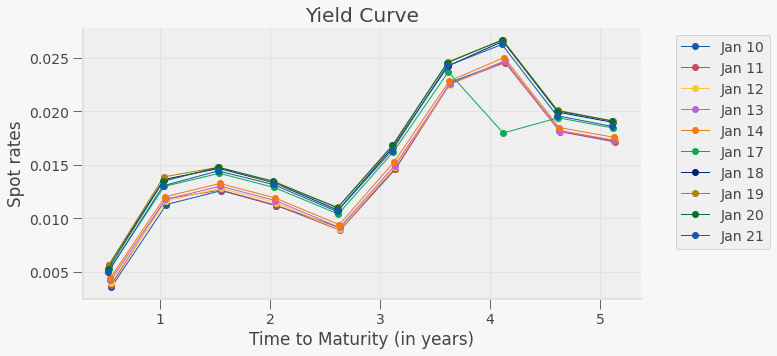

In [16]:
bondyield_dict = {"by1": y[0], "by2": y[1], "by3": y[2], "by4": y[3],
           "by5": y[4], "by6": y[5], "by7": y[6], "by8": y[7],
           "by9": y[8], "by10": y[9]}

ttm_df = bonds[["ttm1","ttm2","ttm3","ttm4","ttm5","ttm6","ttm7","ttm8","ttm9","ttm10"]]
y_df = pd.DataFrame(bondyield_dict)

by = pd.merge(ttm_df, y_df, left_index=True, right_index=True)

plt.figure(figsize=(10,5))
for i in range(0, 10):
    plt.plot(ttm[i], y[i], label=dates[i], linewidth=1, marker='o')
plt.xlabel('Time to Maturity (in years)')
plt.ylabel('Spot rates')
plt.title("Yield Curve")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [17]:
# Pull out the approx. 1yr, 2yr, 3yr, 4yr, 
# and 5yr spot rate and time

spot1_5 = []
for i in range(10):
    sp = []
    yd = y[i]
    sp = [yd[1],yd[3],yd[5],yd[7],yd[9]]
    spot1_5.append(sp)

ttm1_5 = []
for t in ttm:
    tm = []
    time = t[i]
    tm = [t[1], t[3],t[5],t[7],t[9]]
    ttm1_5.append(tm)


In [18]:
# FORWARD RATES

fwd_all = []

for i in range(len(ttm1_5)):
    t = ttm1_5[i]       # each day's time-to-maturity
    spot = spot1_5[i]   # each day's spot rates
    fwd = []
    for n in range(1,5):
        t1 = t[0]
        spot1 = spot[0]
        f = ((((1+spot[n])**t[n])/((1+spot1)**t1))**(1/(t[n]-t1))) - 1
        fwd.append(f)
    fwd_round = [round(elem, 5) for elem in fwd]
    fwd_all.append(fwd_round)

In [19]:
ttm_f = []
for t in ttm:
    tm = []
    time = t[i]
    tm = [t[3],t[5],t[7],t[9]]
    ttm_f.append(tm)

f_dict = {"f1": fwd_all[0], "f2": fwd_all[1], "f3": fwd_all[2], "f4": fwd_all[3],
           "f5": fwd_all[4], "f6": fwd_all[5], "f7": fwd_all[6], "f8": fwd_all[7],
           "f9": fwd_all[8], "f10": fwd_all[9]}

ttm_f_dict = {"t1": ttm_f[0], "t2": ttm_f[1], "t3": ttm_f[2], "t4": ttm_f[3],
           "t5": ttm_f[4], "t6": ttm_f[5], "t7": ttm_f[6], "t8": ttm_f[7],
           "t9": ttm_f[8], "t10": ttm_f[9]}


ttm_f_df = pd.DataFrame(ttm_f_dict)
f_df = pd.DataFrame(f_dict)

fwd = pd.merge(ttm_f_df, f_df, left_index=True, right_index=True)

fwd

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2.056,2.053,2.050,2.047,2.044,2.036,2.033,2.031,2.027,2.025,0.01107,0.01060,0.01133,0.01156,0.01179,0.01279,0.01304,0.01286,0.01350,0.01332
1,3.139,3.136,3.133,3.131,3.128,3.119,3.117,3.114,3.111,3.108,0.01634,0.01598,0.01645,0.01652,0.01694,0.01781,0.01819,0.01817,0.01848,0.01798
2,4.139,4.136,4.133,4.131,4.128,4.119,4.117,4.114,4.111,4.108,0.02930,0.02895,0.02926,0.02917,0.02948,0.01967,0.03093,0.03100,0.03112,0.03069
3,5.139,5.136,5.133,5.131,5.128,5.119,5.117,5.114,5.111,5.108,0.01876,0.01851,0.01880,0.01869,0.01900,0.01984,0.02034,0.02043,0.02053,0.02001


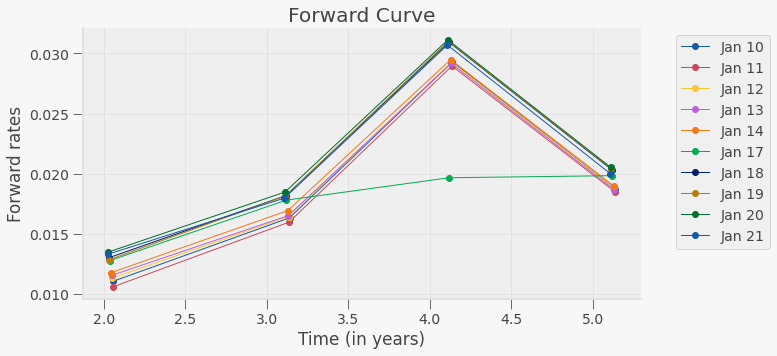

In [20]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.plot(ttm_f[i], fwd_all[i], label=dates[i], linewidth=1, marker='o')
plt.xlabel('Time (in years)')
plt.ylabel('Forward rates')
plt.title("Forward Curve")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [21]:
by.to_excel("Spot_data.xlsx")

In [22]:
fwd.to_excel("Forward_data.xlsx")